In [68]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [69]:
avg_prices = pd.read_excel("monthly_average_retail_prices.xlsx")
avg_prices_w_key = pd.read_excel("monthly_average_retail_prices_with_key.xlsx")

In [70]:
avg_prices

,Products,"Round steak, 1 kilogram","Sirloin steak, 1 kilogram","Prime rib roast, 1 kilogram","Blade roast, 1 kilogram","Stewing beef, 1 kilogram","Ground beef, 1 kilogram","Pork chops, 1 kilogram","Chicken, 1 kilogram","Bacon, 500 grams","Wieners, 450 grams","Canned salmon, 213 grams","Homogenized milk, 4 litres","Partly skimmed milk, 4 litres","Butter, 454 grams","Processed cheese slices, 250 grams","Evaporated milk, 385 millilitres","Eggs, 1 dozen","Bread, 675 grams","Soda crackers, 450 grams","Macaroni, 500 grams","Flour, 2.5 kilograms","Corn flakes, 675 grams","Apples, 1 kilogram","Bananas, 1 kilogram","Oranges, 1 kilogram","Apple juice, 1.36 litres","Orange juice, 1 litre","Carrots, 1 kilogram","Mushrooms, 1 kilogram","Onions, 1 kilogram","Potatoes, 4.54 kilograms","French fried potatoes, frozen, 1 kilogram","Baked beans, canned, 398 millilitres","Tomatoes, canned, 796 millilitres","Tomato juice, 1.36 litres","Ketchup, 1 litre","Sugar, white, 2 kilograms","Coffee, roasted, 300 grams","Coffee, instant, 200 grams",Tea (72 bags),"Cooking or salad oil, 1 litre","Soup, canned, 284 millilitres","Baby food, 128 millilitres","Peanut butter, 500 grams",Paper towels (2 rolls),Facial tissue (200 tissues),Bathroom tissue (4 rolls),"Shampoo, 300 millilitres","Deodorant, 60 grams","Toothpaste, 100 millilitres",Cigarettes (200)
0,2019-08-01,17.16,22.17,32.94,15.75,15.55,11.23,11.72,7.39,6.99,4.34,5.89,5.77,5.15,5.03,2.52,1.96,3.25,2.83,3.47,1.54,4.58,5.64,4.98,1.55,3.79,2.18,4.56,2.40,9.12,2.78,10.39,2.95,1.29,1.59,2.94,3.60,2.49,5.02,7.22,4.36,3.16,1.26,1.31,2.93,3.08,3.39,2.55,4.19,4.54,3.13,120.27
1,2019-09-01,17.07,22.42,32.61,15.62,15.58,11.67,12.07,7.44,7.04,4.28,5.81,5.76,5.16,4.97,2.30,1.87,3.34,2.82,3.40,1.45,4.62,5.30,4.95,1.54,3.44,2.13,4.05,2.34,9.17,2.42,10.28,3.08,1.19,1.58,2.88,3.67,2.52,4.86,7.00,4.31,3.20,1.15,1.34,2.82,3.09,3.42,2.39,4.13,4.50,3.08,120.40
2,2019-10-01,17.36,22.17,32.66,15.10,15.46,11.54,11.80,7.55,7.37,4.83,5.83,5.80,5.20,5.10,2.52,1.87,3.37,2.84,3.40,1.60,4.37,5.58,4.41,1.56,3.69,2.17,4.01,2.06,8.95,2.26,9.77,3.02,1.38,1.51,2.82,3.66,2.44,4.91,6.90,4.17,3.07,1.30,1.36,2.99,3.11,3.96,2.53,4.12,4.38,3.18,120.99
3,2019-11-01,17.32,22.43,34.08,14.68,15.51,11.69,11.58,7.36,7.34,4.68,5.81,5.73,5.21,5.05,2.41,1.93,3.36,2.82,3.39,1.58,4.35,5.64,4.18,1.56,3.85,2.16,4.20,1.94,8.83,2.16,9.47,3.14,1.19,1.49,2.96,3.65,2.45,5.02,6.45,4.31,3.07,1.15,1.42,2.78,3.20,2.77,2.44,4.13,4.17,3.11,121.52
4,2019-12-01,17.22,22.12,34.33,15.47,15.34,11.76,12.02,7.04,7.08,4.90,5.80,5.75,5.21,5.00,2.54,1.84,3.37,2.83,3.44,1.56,4.26,5.73,4.35,1.55,3.73,2.19,4.02,2.01,8.73,2.22,9.37,2.93,1.20,1.46,2.76,3.67,2.41,5.01,6.79,4.39,3.02,1.23,1.46,2.83,3.16,2.68,2.46,4.07,4.28,3.35,121.71
5,2020-01-01,17.36,21.81,34.56,16.22,15.45,11.53,11.72,7.43,6.85,4.85,6.09,5.81,5.21,4.96,2.44,1.94,3.48,2.87,3.43,1.49,4.50,5.82,4.33,1.55,3.64,2.27,4.36,1.94,8.87,2.19,9.55,3.03,1.27,1.47,2.91,3.67,2.53,4.95,6.68,4.24,3.00,1.14,1.46,2.83,3.01,2.68,2.55,4.06,4.38,3.28,124.75
6,2020-02-01,17.79,21.67,34.36,15.66,15.50,11.33,12.07,7.46,7.15,4.94,6.08,5.91,5.32,5.30,2.68,1.80,3.48,2.90,3.33,1.62,4.40,5.80,4.32,1.56,3.44,2.23,4.39,2.07,8.73,2.19,9.49,3.04,1.26,1.53,2.92,3.80,2.42,5.02,7.42,4.38,3.08,1.16,1.45,2.80,3.05,2.73,2.63,4.10,4.30,3.42,125.54
7,2020-03-01,17.51,21.88,35.24,16.34,15.44,11.77,11.54,7.60,6.96,5.04,6.07,5.94,5.33,5.21,2.59,1.81,3.41,2.90,3.47,1.64,4.48,5.88,4.41,1.55,3.47,2.28,4.24,2.12,9.05,2.25,9.78,3.15,1.25,1.62,2.86,3.83,2.57,5.00,7.06,4.21,3.05,1.20,1.51,2.82,3.07,2.81,2.53,4.03,4.30,3.43,125.84
8,2020-04-01,17.38,22.51,33.23,16.74,15.96,11.95,12.15,7.21,7.21,5.13,6.04,5.93,5.31,5.17,2.79,1.92,3.60,2.83,3.41,1.61,4.20,5.81,4.25,1.55,3.58,2.25,4.28,2.30,9.03,2.20,10.43,3.17,1.43,1.53,2.89,3.89,2.45,4.99,6.75,4.37,3.01,1.38,1.50,2.79,3.46,3.12,2.75,3.99,4.21,3.38,126.54
9,2020-05-01,18.92,23.77,36.43,17.24,17.54,12.69,11.98,7.05,6.93,4.85,6.20,5.89,5.32,5.18,2.68,2.04,3.59,2.84,3.52,1.77,4.83,5.93,4.31,1.57,3.85,2.23,4.42,2.51,9.1

In [71]:
avg_prices_w_key

,Products,KEY,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00
0,"Canned salmon, 213 grams",CANNED,5.89,5.81,5.83,5.81,5.80,6.09,6.08,6.07,6.04,6.20,6.22,6.32,6.35,6.61,6.71,6.66,6.53,6.67,6.60,6.48,6.41,6.23,6.53,6.64,6.53
1,"Baked beans, canned, 398 millilitres",CANNED,1.29,1.19,1.38,1.19,1.20,1.27,1.26,1.25,1.43,1.37,1.27,1.28,1.32,1.25,1.40,1.35,1.35,1.32,1.35,1.25,1.26,1.28,1.23,1.27,1.28
2,"Tomatoes, canned, 796 millilitres",CANNED,1.59,1.58,1.51,1.49,1.46,1.47,1.53,1.62,1.53,1.63,1.66,1.74,1.66,1.64,1.47,1.46,1.48,1.45,1.48,1.49,1.60,1.60,1.63,1.58,1.74
3,"Soup, canned, 284 millilitres",CANNED,1.26,1.15,1.30,1.15,1.23,1.14,1.16,1.20,1.38,1.31,1.24,1.35,1.21,1.23,1.23,1.29,1.29,1.28,1.28,1.24,1.31,1.27,1.21,1.27,1.25
4,Paper towels (2 rolls),CLEANING,3.08,3.09,3.11,3.20,3.16,3.01,3.05,3.07,3.46,3.28,3.20,3.19,3.15,3.31,3.33,3.33,3.33,3.17,3.12,3.10,3.07,3.13,3.06,3.21,3.21
5,Facial tissue (200 tissues),CLEANING,3.39,3.42,3.96,2.77,2.68,2.68,2.73,2.81,3.12,3.06,3.03,2.67,2.70,2.66,2.79,2.81,2.61,2.77,2.47,2.77,2.75,2.87,2.90,2.68,2.84
6,Bathroom tissue (4 rolls),CLEANING,2.55,2.39,2.53,2.44,2.46,2.55,2.63,2.53,2.75,2.72,2.61,2.52,2.61,2.55,2.63,2.67,2.74,2.79,2.69,2.76,2.69,2.77,2.76,2.85,2.91
7,"Shampoo, 300 millilitres",CLEANING,4.19,4.13,4.12,4.13,4.07,4.06,4.10,4.03,3.99,3.85,3.79,3.88,3.92,3.80,4.03,3.99,3.94,4.04,3.98,3.91,3.92,3.94,4.00,4.13,4.19
8,"Deodorant, 60 grams",CLEANING,4.54,4.50,4.38,4.17,4.28,4.38,4.30,4.30,4.21,4.11,4.07,4.01,4.01,4.04,3.98,4.14,4.23,4.15,4.10,4.24,4.35,4.20,4.24,4.20,4.37
9,"Toothpaste, 100 millilitres",CLEANING,3.13,3.08,3.18,3.11,3.35,3.28,3.42,3.43,3.38,3.29,3.17,3.37,3.13,3.32,3.35,3.53,3.38,3.39,3.37,3.38,3.41,3.49,3.42,3.47,3.43


In [72]:
canned = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'CANNED']
canned = canned.drop('KEY', 1)
meat = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'MEAT']
meat = meat.drop('KEY', 1)
dairy = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'DAIRY/EGGS']
dairy = dairy.drop('KEY', 1)
juice = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'JUICE']
juice = juice.drop('KEY', 1)
fruit = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'FRUIT']
fruit = fruit.drop('KEY', 1)
veg = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'VEGETABLE']
veg = veg.drop('KEY', 1)
gluten = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'GLUTEN']
gluten = gluten.drop('KEY', 1)
fruit  = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'FRUIT']
fruit  = fruit .drop('KEY', 1)
processed = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'PROCESSED FOOD']
processed = processed.drop('KEY', 1)
condiment = avg_prices_w_key.loc[avg_prices_w_key ['KEY'] == 'CONDIMENT']
condiment  = condiment.drop('KEY', 1)


In [73]:
meat

,Products,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00
33,"Round steak, 1 kilogram",17.16,17.07,17.36,17.32,17.22,17.36,17.79,17.51,17.38,18.92,21.93,18.39,18.30,18.71,17.69,18.07,17.66,17.81,17.86,17.97,17.94,18.53,18.71,19.05,19.23
34,"Sirloin steak, 1 kilogram",22.17,22.42,22.17,22.43,22.12,21.81,21.67,21.88,22.51,23.77,26.68,24.45,22.49,22.60,23.29,22.54,22.65,22.68,22.43,23.03,23.60,23.38,24.34,25.22,25.33
35,"Prime rib roast, 1 kilogram",32.94,32.61,32.66,34.08,34.33,34.56,34.36,35.24,33.23,36.43,38.78,37.09,36.09,35.83,33.99,35.57,37.19,37.66,36.35,36.66,36.08,38.60,39.80,41.39,39.26
36,"Blade roast, 1 kilogram",15.75,15.62,15.10,14.68,15.47,16.22,15.66,16.34,16.74,17.24,20.16,18.49,16.40,16.41,17.05,16.59,16.50,16.25,17.17,15.49,17.07,17.62,17.96,17.98,18.20
37,"Stewing beef, 1 kilogram",15.55,15.58,15.46,15.51,15.34,15.45,15.50,15.44,15.96,17.54,19.29,18.31,16.73,16.68,16.82,16.50,15.82,15.88,15.83,15.40,15.88,16.96,17.26,17.41,17.54
38,"Ground beef, 1 kilogram",11.23,11.67,11.54,11.69,11.76,11.53,11.33,11.77,11.95,12.69,12.96,12.50,11.69,11.00,11.38,11.16,11.02,11.55,11.06,11.22,11.53,11.28,11.00,11.31,11.56
39,"Pork chops, 1 kilogram",11.72,12.07,11.80,11.58,12.02,11.72,12.07,11.54,12.15,11.98,12.58,12.39,12.04,11.96,11.65,12.03,11.71,12.07,11.55,11.48,11.80,11.60,12.09,12.22,12.53
40,"Chicken, 1 kilogram",7.39,7.44,7.55,7.36,7.04,7.43,7.46,7.60,7.21,7.05,6.87,7.41,7.59,7.57,7.94,7.42,7.64,7.35,7.00,7.73,7.87,7.76,7.72,8.07,8.13
41,"Bacon, 500 grams",6.99,7.04,7.37,7.34,7.08,6.85,7.15,6.96,7.21,6.93,7.41,7.25,7.24,7.07,6.96,7.40,7.39,7.32,7.44,7.29,7.69,7.89,7.79,7.99,8.24
42,"Wieners, 450 grams",4.34,4.28,4.83,4.68,4.90,4.85,4.94,5.04,5.13,4.85,4.86,4.47,4.37,4.48,4.87,4.93,4.90,4.86,5.02,4.73,4.89,4.86,4.89,4.86,4.96


In [74]:
stats.pearsonr(avg_prices['Round steak, 1 kilogram'], avg_prices['Sirloin steak, 1 kilogram'])

(0.8649714789295196, 2.4338942730692292e-08)

In [75]:
meat_t = meat.set_index('Products').T

In [76]:
meat_t

Products,"Round steak, 1 kilogram","Sirloin steak, 1 kilogram","Prime rib roast, 1 kilogram","Blade roast, 1 kilogram","Stewing beef, 1 kilogram","Ground beef, 1 kilogram","Pork chops, 1 kilogram","Chicken, 1 kilogram","Bacon, 500 grams","Wieners, 450 grams"
2019-08-01 00:00:00,17.16,22.17,32.94,15.75,15.55,11.23,11.72,7.39,6.99,4.34
2019-09-01 00:00:00,17.07,22.42,32.61,15.62,15.58,11.67,12.07,7.44,7.04,4.28
2019-10-01 00:00:00,17.36,22.17,32.66,15.10,15.46,11.54,11.80,7.55,7.37,4.83
2019-11-01 00:00:00,17.32,22.43,34.08,14.68,15.51,11.69,11.58,7.36,7.34,4.68
2019-12-01 00:00:00,17.22,22.12,34.33,15.47,15.34,11.76,12.02,7.04,7.08,4.90
2020-01-01 00:00:00,17.36,21.81,34.56,16.22,15.45,11.53,11.72,7.43,6.85,4.85
2020-02-01 00:00:00,17.79,21.67,34.36,15.66,15.50,11.33,12.07,7.46,7.15,4.94
2020-03-01 00:00:00,17.51,21.88,35.24,16.34,15.44,11.77,11.54,7.60,6.96,5.04
2020-04-01 00:00:00,17.38,22.51,33.23,16.74,15.96,11.95,12.15,7.21,7.21,5.13
2020-05-01 00:00:00,18.92,23.77,36.43,17.24,17.54,12.69,11.98,7.05,6.93,4.85


In [77]:
meat_corr = avg_prices[meat_t.columns.values].corr().round(2)
meat_corr
meat_corr.style.background_gradient(cmap="BuPu")


,"Round steak, 1 kilogram","Sirloin steak, 1 kilogram","Prime rib roast, 1 kilogram","Blade roast, 1 kilogram","Stewing beef, 1 kilogram","Ground beef, 1 kilogram","Pork chops, 1 kilogram","Chicken, 1 kilogram","Bacon, 500 grams","Wieners, 450 grams"
"Round steak, 1 kilogram",1.000000,0.860000,0.690000,0.840000,0.880000,0.460000,0.610000,-0.070000,0.410000,0.100000
"Sirloin steak, 1 kilogram",0.860000,1.000000,0.750000,0.870000,0.890000,0.430000,0.650000,0.170000,0.600000,0.090000
"Prime rib roast, 1 kilogram",0.690000,0.750000,1.000000,0.720000,0.650000,0.000000,0.380000,0.330000,0.730000,0.240000
"Blade roast, 1 kilogram",0.840000,0.870000,0.720000,1.000000,0.900000,0.410000,0.600000,0.040000,0.460000,0.210000
"Stewing beef, 1 kilogram",0.880000,0.890000,0.650000,0.900000,1.000000,0.530000,0.680000,0.010000,0.370000,-0.030000
"Ground beef, 1 kilogram",0.460000,0.430000,0.000000,0.410000,0.530000,1.000000,0.500000,-0.500000,-0.220000,-0.030000
"Pork chops, 1 kilogram",0.610000,0.650000,0.380000,0.600000,0.680000,0.500000,1.000000,-0.080000,0.320000,-0.050000
"Chicken, 1 kilogram",-0.070000,0.170000,0.330000,0.040000,0.010000,-0.500000,-0.080000,1.000000,0.520000,-0.010000
"Bacon, 500 grams",0.410000,0.600000,0.730000,0.460000,0.370000,-0.220000,0.320000,0.520000,1.000000,0.280000
"Wieners, 450 grams",0.100000,0.090000,0.240000,0.210000,-0.030000,-0.030000,-0.050000,-0.010000,0.280000,1.000000


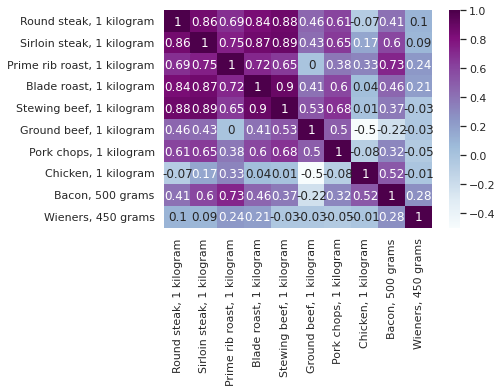

In [78]:
meat_t = meat.set_index('Products').T
meat_corr = avg_prices[meat_t.columns.values].corr().round(2)
meat_corr
meat_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(meat_corr, annot=True, cmap="BuPu")

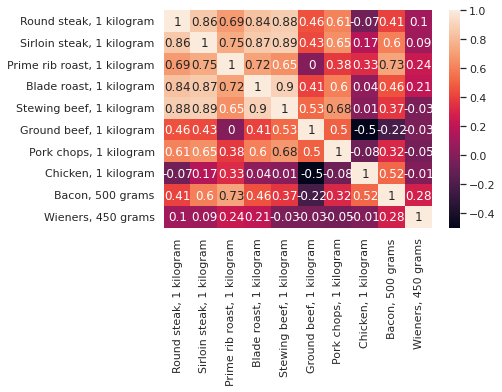

In [79]:
meat_t = meat.set_index('Products').T
meat_corr = avg_prices[meat_t.columns.values].corr().round(2)
meat_corr
meat_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(meat_corr, annot=True)

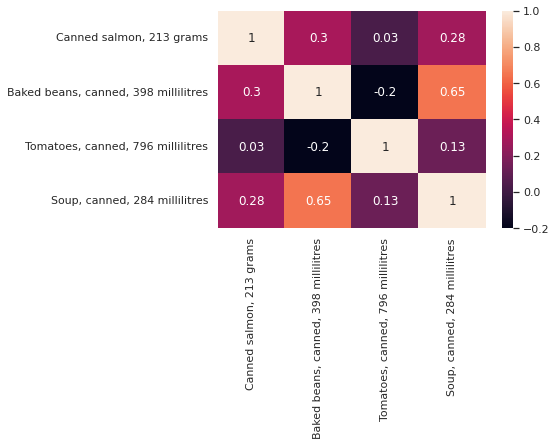

In [80]:
canned_t = canned.set_index('Products').T
canned_corr = avg_prices[canned_t.columns.values].corr().round(2)
canned_corr
canned_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(canned_corr, annot=True)

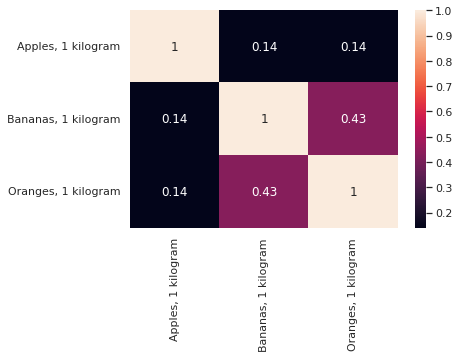

In [81]:
fruit_t = fruit.set_index('Products').T
fruit_corr = avg_prices[fruit_t.columns.values].corr().round(2)
fruit_corr
fruit_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(fruit_corr, annot=True)

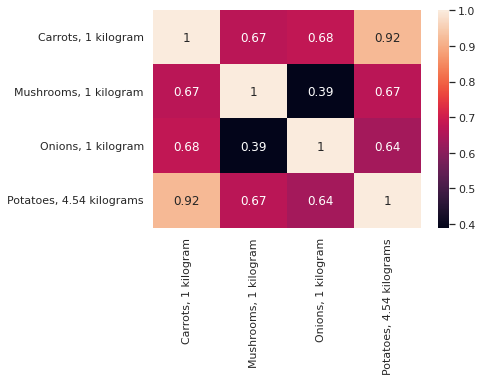

In [82]:
veg_t = veg.set_index('Products').T
veg_corr = avg_prices[veg_t.columns.values].corr().round(2)
veg_corr
veg_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(veg_corr, annot=True)

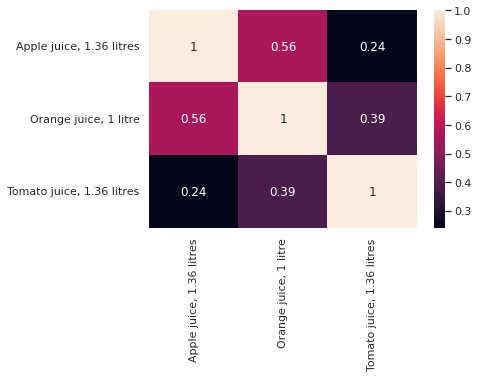

In [83]:
juice_t = juice.set_index('Products').T
juice_corr = avg_prices[juice_t.columns.values].corr().round(2)
juice_corr
juice_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(juice_corr, annot=True)

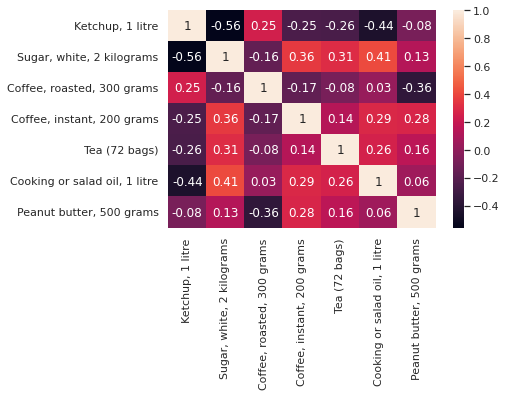

In [84]:
condiment_t = condiment.set_index('Products').T
condiment_corr = avg_prices[condiment_t.columns.values].corr().round(2)
condiment_corr
condiment_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(condiment_corr, annot=True)

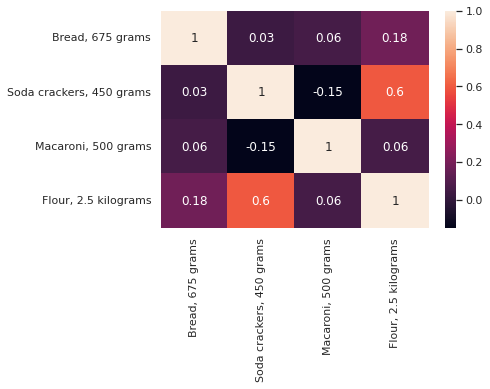

In [85]:
gluten_t = gluten.set_index('Products').T
gluten_corr = avg_prices[gluten_t.columns.values].corr().round(2)
gluten_corr
gluten_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(gluten_corr, annot=True)

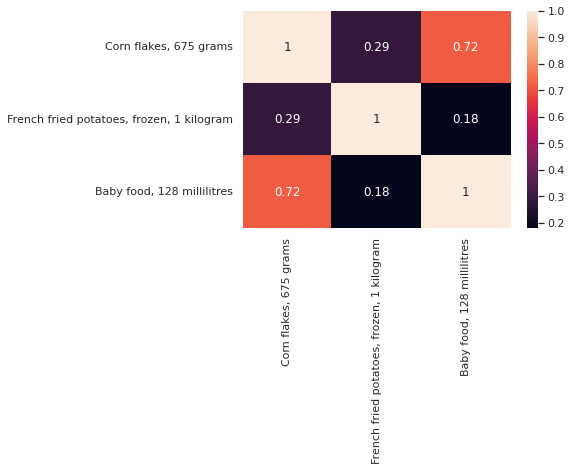

In [86]:
processed_t = processed.set_index('Products').T
processed_corr = avg_prices[processed_t.columns.values].corr().round(2)
processed_corr
processed_corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns; sns.set_theme()
sns.heatmap(processed_corr, annot=True)

In [87]:
prices_corr = avg_prices[avg_prices.columns.values].corr().round(2)
prices_corr
prices_corr.style.background_gradient(cmap="BuPu")


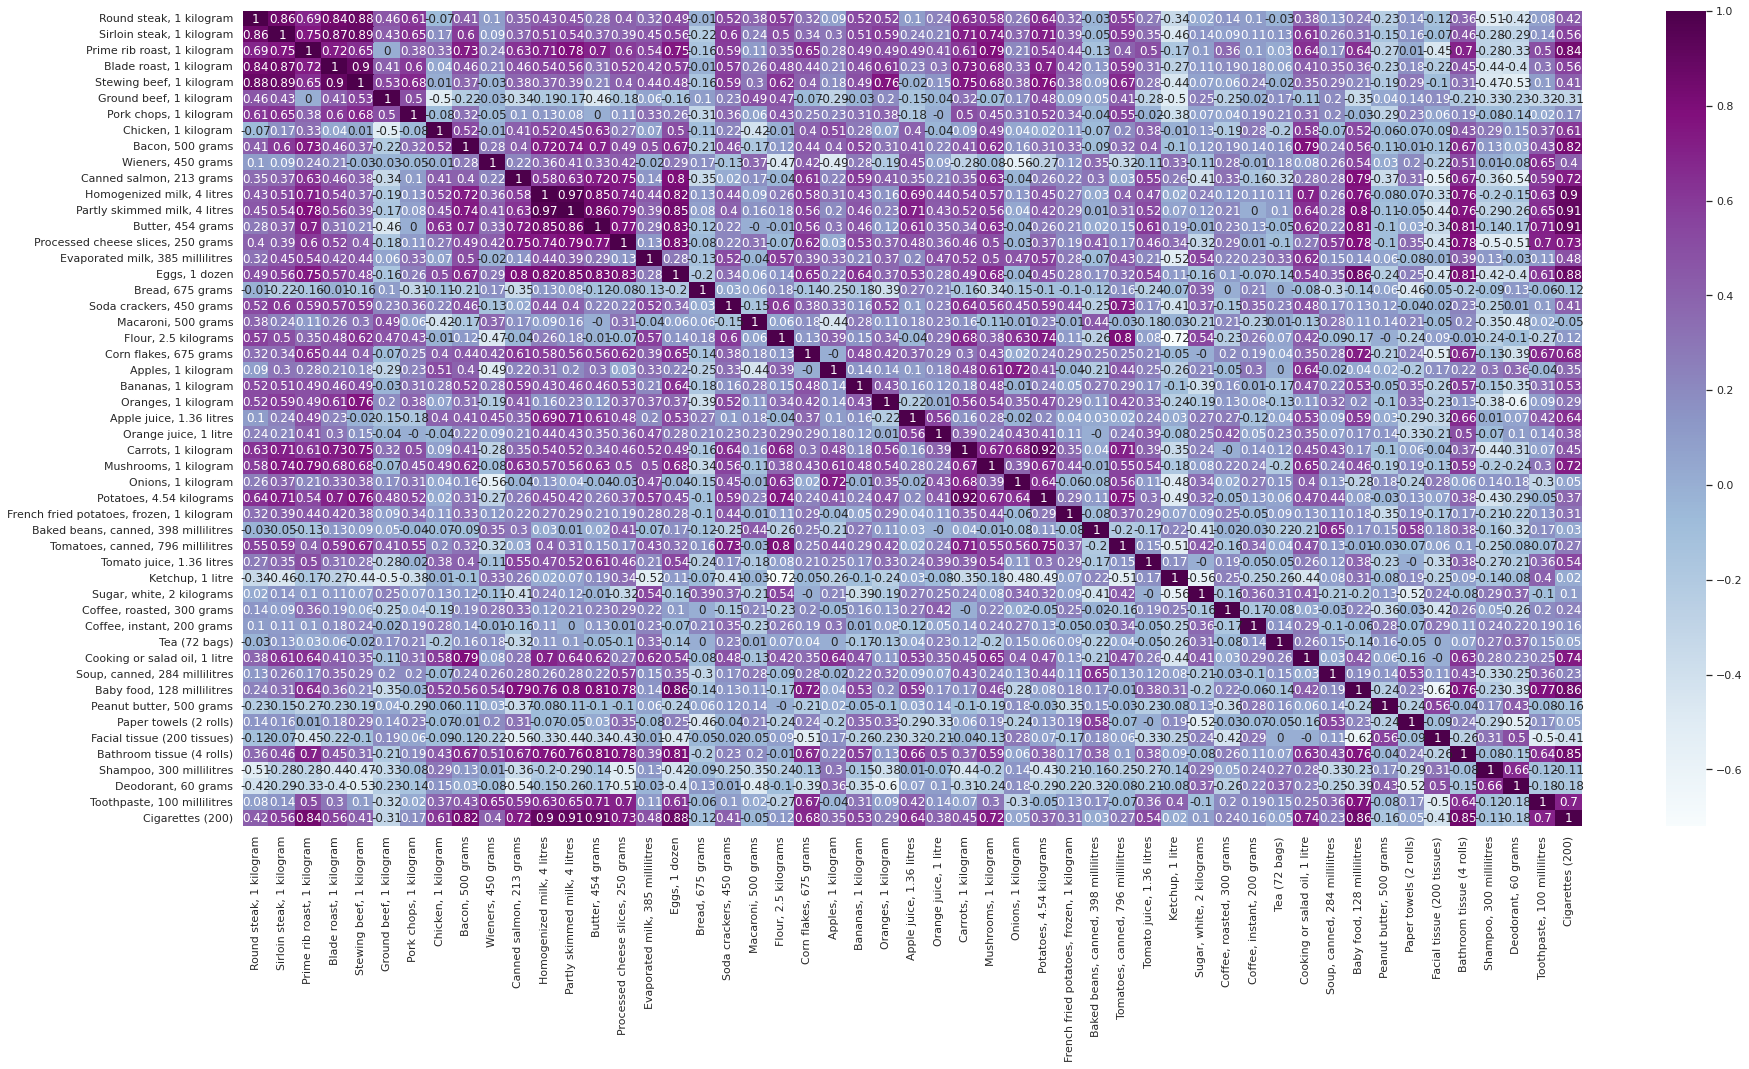

In [88]:
plt.figure(figsize = (30,15))
import seaborn as sns; sns.set_theme()
sns.heatmap(prices_corr, annot=True,cmap="BuPu")

In [89]:
prices_corr_list = prices_corr.unstack()
prices_corr_list = prices_corr_list.sort_values(kind="quicksort")
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(prices_corr_list)

Ketchup, 1 litre                           Flour, 2.5 kilograms                        -0.72
Flour, 2.5 kilograms                       Ketchup, 1 litre                            -0.72
Facial tissue (200 tissues)                Baby food, 128 millilitres                  -0.62
Baby food, 128 millilitres                 Facial tissue (200 tissues)                 -0.62
Deodorant, 60 grams                        Oranges, 1 kilogram                         -0.60
Oranges, 1 kilogram                        Deodorant, 60 grams                         -0.60
Wieners, 450 grams                         Onions, 1 kilogram                          -0.56
Facial tissue (200 tissues)                Canned salmon, 213 grams                    -0.56
Ketchup, 1 litre                           Sugar, white, 2 kilograms                   -0.56
Sugar, white, 2 kilograms                  Ketchup, 1 litre                            -0.56
Canned salmon, 213 grams                   Facial tissue (200 tissues)

In [90]:
prices_corr_list_filtered = prices_corr_list[prices_corr_list != 1]

In [91]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(prices_corr_list_filtered)

Ketchup, 1 litre                           Flour, 2.5 kilograms                        -0.72
Flour, 2.5 kilograms                       Ketchup, 1 litre                            -0.72
Facial tissue (200 tissues)                Baby food, 128 millilitres                  -0.62
Baby food, 128 millilitres                 Facial tissue (200 tissues)                 -0.62
Deodorant, 60 grams                        Oranges, 1 kilogram                         -0.60
Oranges, 1 kilogram                        Deodorant, 60 grams                         -0.60
Wieners, 450 grams                         Onions, 1 kilogram                          -0.56
Facial tissue (200 tissues)                Canned salmon, 213 grams                    -0.56
Ketchup, 1 litre                           Sugar, white, 2 kilograms                   -0.56
Sugar, white, 2 kilograms                  Ketchup, 1 litre                            -0.56
Canned salmon, 213 grams                   Facial tissue (200 tissues)

In [92]:
prices_corr_filtered = prices_corr_list_filtered.to_frame().reset_index()
prices_corr_filtered.columns = ['PRODUCT1', 'PRODUCT2', 'CORRELATION COEFFICIENT']

In [93]:
prices_corr_filtered.to_excel("Book4.xlsx")  

In [94]:
prices_corr_filtered.copy()

,PRODUCT1,PRODUCT2,CORRELATION COEFFICIENT
0,"Ketchup, 1 litre","Flour, 2.5 kilograms",-0.72
1,"Flour, 2.5 kilograms","Ketchup, 1 litre",-0.72
2,Facial tissue (200 tissues),"Baby food, 128 millilitres",-0.62
3,"Baby food, 128 millilitres",Facial tissue (200 tissues),-0.62
4,"Deodorant, 60 grams","Oranges, 1 kilogram",-0.60
...,...,...,...
2545,Cigarettes (200),"Butter, 454 grams",0.91
2546,"Potatoes, 4.54 kilograms","Carrots, 1 kilogram",0.92
2547,"Carrots, 1 kilogram","Potatoes, 4.54 kilograms",0.92
2548,"Partly skimmed milk, 4 litres","Homogenized milk, 4 litres",0.97


In [95]:
m = ~pd.DataFrame(np.sort(prices_corr_filtered[['PRODUCT1','PRODUCT2']], axis=1)).duplicated()
prices_corr_filtered = prices_corr_filtered[m]

In [96]:
prices_corr_filtered.head()

,PRODUCT1,PRODUCT2,CORRELATION COEFFICIENT
0,"Ketchup, 1 litre","Flour, 2.5 kilograms",-0.72
2,Facial tissue (200 tissues),"Baby food, 128 millilitres",-0.62
4,"Deodorant, 60 grams","Oranges, 1 kilogram",-0.60
6,"Wieners, 450 grams","Onions, 1 kilogram",-0.56
7,Facial tissue (200 tissues),"Canned salmon, 213 grams",-0.56


In [97]:
prices_corr_filtered.tail()

,PRODUCT1,PRODUCT2,CORRELATION COEFFICIENT
2540,"Blade roast, 1 kilogram","Stewing beef, 1 kilogram",0.90
2542,Cigarettes (200),"Partly skimmed milk, 4 litres",0.91
2543,"Butter, 454 grams",Cigarettes (200),0.91
2546,"Potatoes, 4.54 kilograms","Carrots, 1 kilogram",0.92
2548,"Partly skimmed milk, 4 litres","Homogenized milk, 4 litres",0.97
